And then

- do something with the "double check design matrix" and "first year talk" sections of this notebook
- get working with snakemake

In [3]:
df = d['df']
tuning_df = sfp.tuning_curves.main(df[df.bootstrap_num.isin(range(2))], bounds=(2**(-5), 2**5))

In [4]:
sfp.plotting.check_tuning_curves(tuning_df, 'test_%s.svg')

In [12]:
tuning_df_summary = sfp.tuning_curves.main(ds['df'])
#tuning_df_summary_2 = sfp.tuning_curves.main(ds['df'], bounds=(2**(-4), 2**7))
#tuning_df_summary = pd.concat([tuning_df_summary_1.assign(bounds='tight'), tuning_df_summary_2.assign(bounds='loose')])

In [ ]:
sfp.plotting.check_tuning_curves(tuning_df_summary, 'test_%s.svg')

In [66]:
df = ds['df']
tmp = df[(df.eccen=='02-03')]

In [35]:
tmp = tuning_df_summary_1[(tuning_df_summary_1.eccen=='01-02')&(tuning_df_summary_1.stimulus_superclass=='forward diagonal')&(tuning_df_summary_1.varea==1)&(tuning_df_summary_1.frequency_type=='freq_space_distance')]

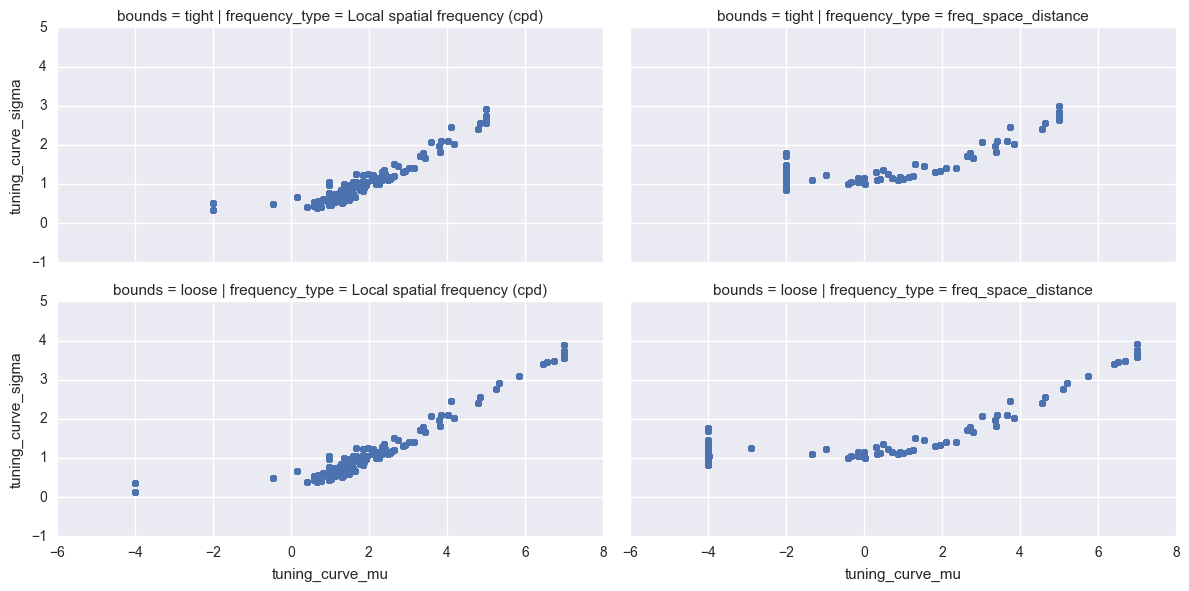

In [18]:
g = sns.FacetGrid(tuning_df_summary, col='frequency_type', row='bounds', aspect=2)
g.map(lambda x,y,**kwargs: sns.plt.scatter(np.log2(x), np.log2(y), **kwargs), 'tuning_curve_mu', 'tuning_curve_sigma')

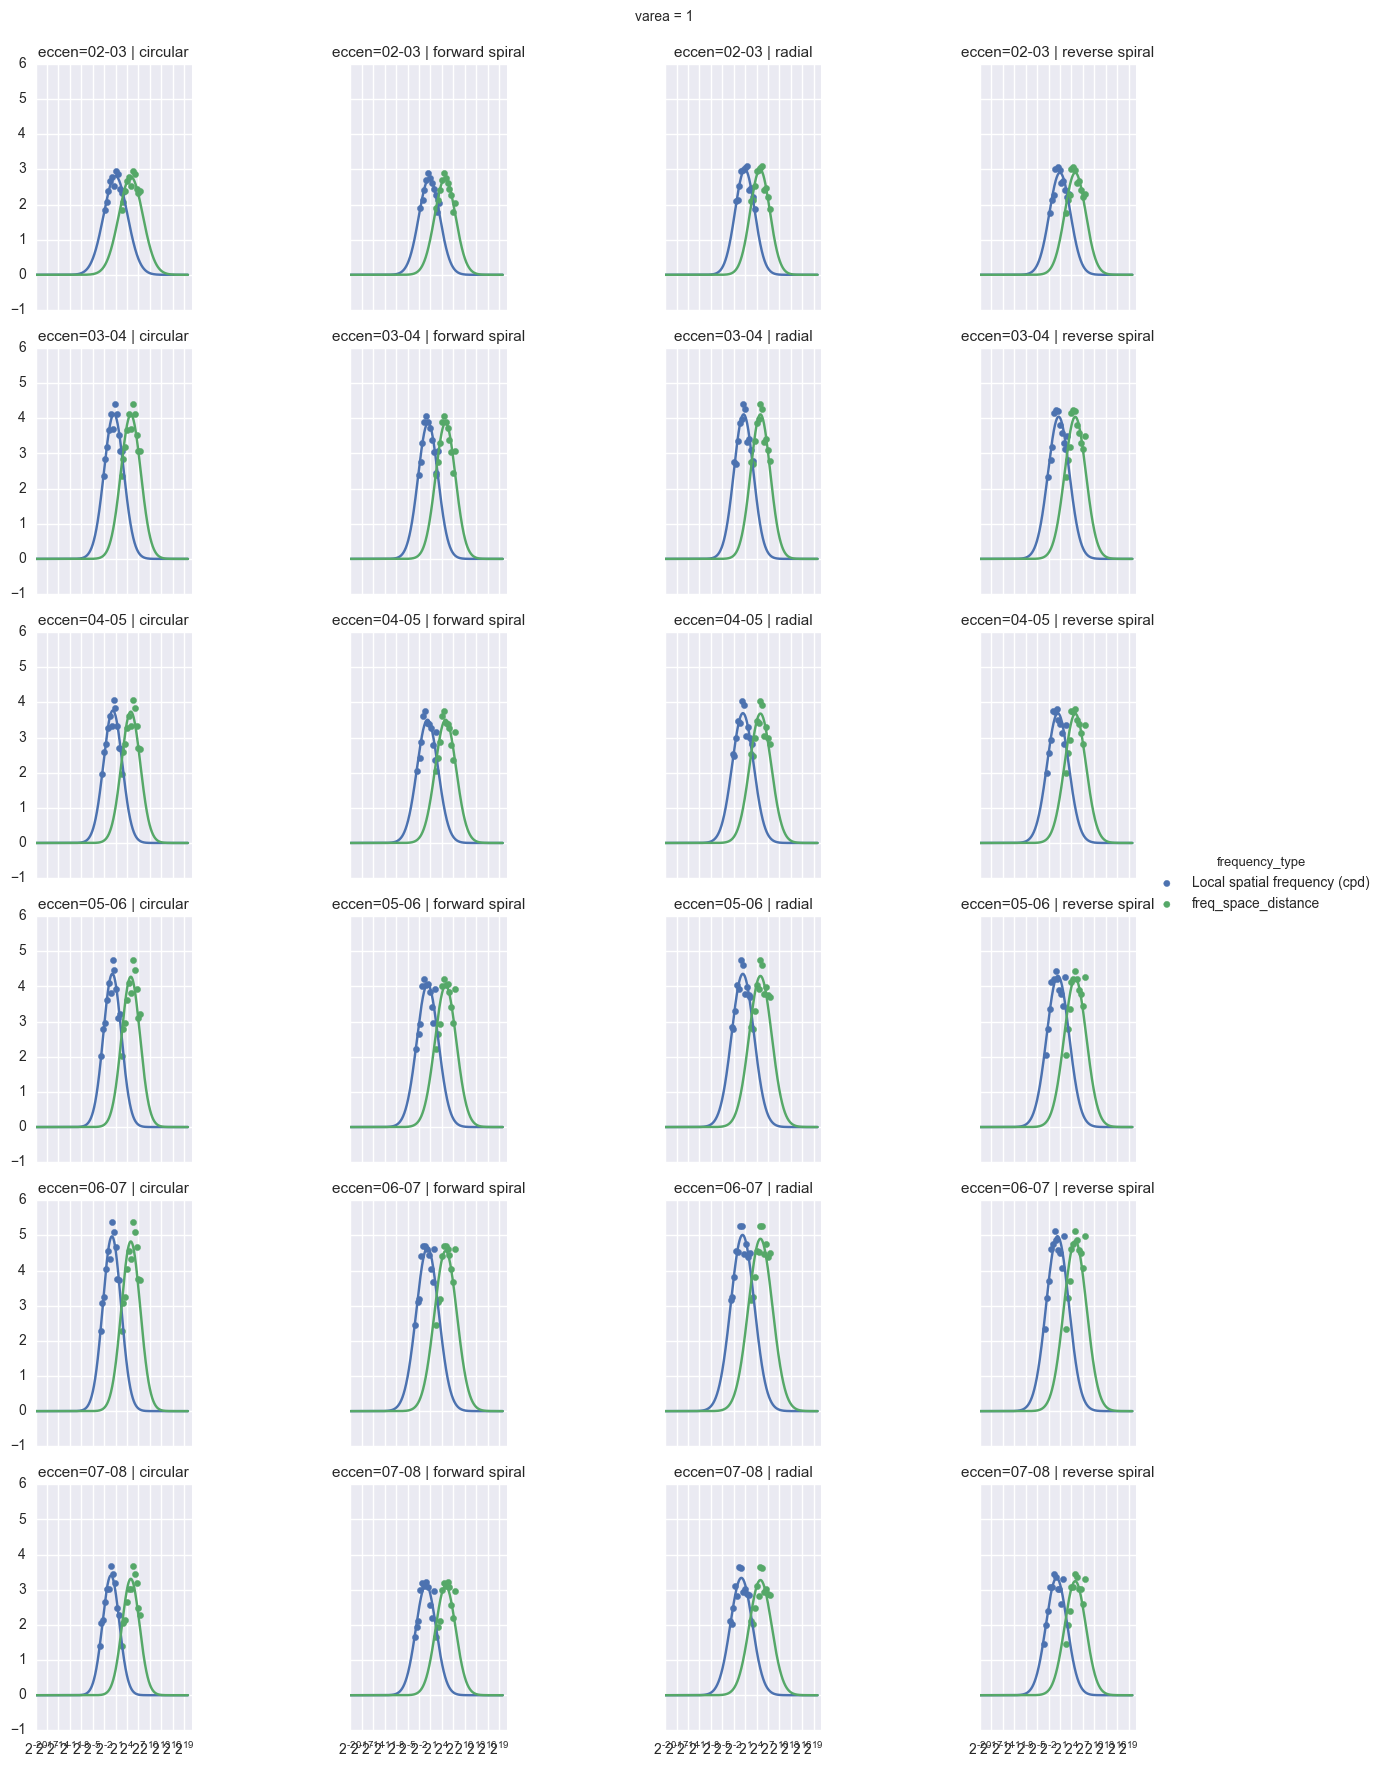

In [10]:
def plot_tuning_curve(**kwargs):
    data = kwargs.pop('data')
    x, y = sfp.tuning_curves.get_tuning_curve_xy_from_df(data, )#x=np.logspace(-7, -2, 10000, base=2))
    sns.plt.semilogx(x, y, basex=2)

g = sns.FacetGrid(tuning_df_summary[(tuning_df_summary.varea==1)], row='eccen', col='stimulus_superclass', hue='frequency_type')
g.map(sns.plt.scatter, 'frequency_value', 'amplitude_estimate')
g.map_dataframe(plot_tuning_curve)
#for ax in g.axes.flatten():
#    ax.set_xlim((2**-7, 2**-2))
g.add_legend()
g.set_titles("eccen={row_name} | {col_name}")
g.fig.suptitle("varea = 1")
sns.plt.subplots_adjust(top=.95)
g.savefig('test.svg')

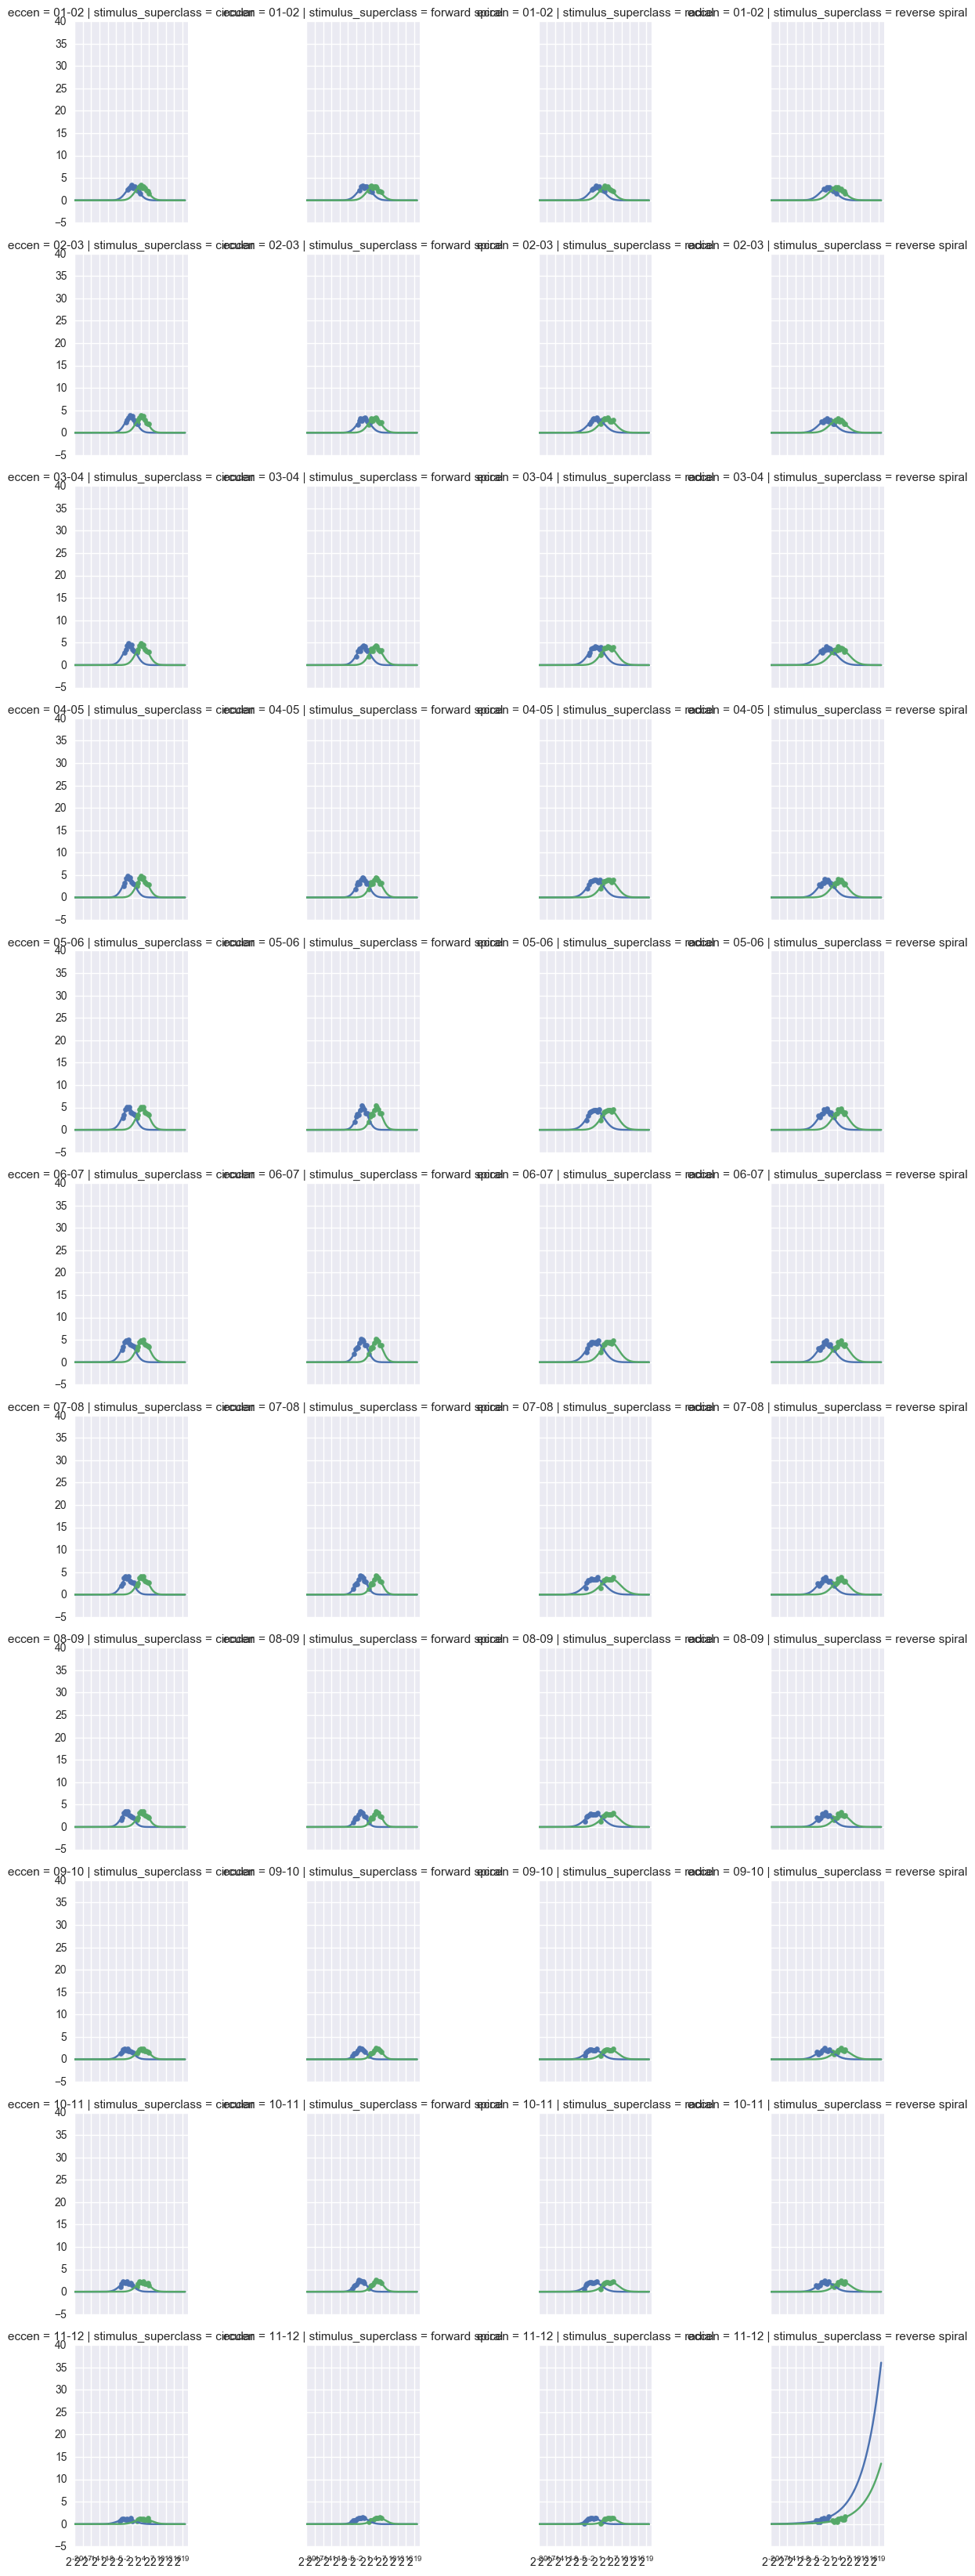

In [11]:
def plot_tuning_curve(**kwargs):
    data = kwargs.pop('data')
    x, y = sfp.tuning_curves.get_tuning_curve_xy_from_df(data)
    sns.plt.semilogx(x, y, basex=2)

g = sns.FacetGrid(tuning_df[(tuning_df.bootstrap_num==1)&(tuning_df.varea==1)], row='eccen', col='stimulus_superclass', hue='frequency_type')
g.map(sns.plt.scatter, 'frequency_value', 'amplitude_estimate')
g.map_dataframe(plot_tuning_curve)

In [32]:
tmp = tuning_df[(tuning_df.bootstrap_num==2)&(tuning_df.varea==2)&(tuning_df.eccen=='11-12')&(tuning_df.stimulus_superclass=='radial')&(tuning_df.frequency_type=='freq_space_distance')]

In [27]:
tmp

varea  eccen  amplitude_estimate stimulus_superclass  freq_space_angle  \
4360      1  11-12            0.853243      reverse spiral         -0.785398   
4361      1  11-12            0.552264      reverse spiral         -0.785398   
4362      1  11-12            0.894482      reverse spiral         -0.785398   
4363      1  11-12            0.565506      reverse spiral         -0.785398   
4364      1  11-12            1.193944      reverse spiral         -0.785398   
4365      1  11-12            1.199914      reverse spiral         -0.785398   
4366      1  11-12            1.329561      reverse spiral         -0.785398   
4367      1  11-12            1.094877      reverse spiral         -0.785398   
4368      1  11-12            1.030902      reverse spiral         -0.785398   
4369      1  11-12            1.763383      reverse spiral         -0.785398   

      bootstrap_num       frequency_type  frequency_value  fit_warning  \
4360              1  freq_space_distance         5.656854         True   
4361              1  freq_space_distance         8.485281         True   
4362              1  freq_space_distance        11.313708         True   
4363              1  freq_space_distance        15.556349         True   
4364              1  freq_space_distance        22.627417         True   
4365              1  freq_space_distance        32.526912         True   
4366              1  freq_space_distance        45.254834         True   
4367              1  freq_space_distance        63.639610         True   
4368              1  freq_space_distance        90.509668         True   
4369              1  freq_space_distance       128.693434         True   

      high_half_max  inf_warning  low_half_max   maxfev  preferred_period  \
4360   4.486668e+63         True  5.202965e+41  1000000      2.068866e-53   
4361   4.486668e+63         True  5.202965e+41  1000000      2.068866e-53   
4362   4.486668e+63         True  5.202965e+41  1000000      2.068866e-53   
4363   4.486668e+63         True  5.202965e+41  1000000      2.068866e-53   
4364   4.486668e+63         True  5.202965e+41  1000000      2.068866e-53   
4365   4.486668e+63         True  5.202965e+41  1000000      2.068866e-53   
4366   4.486668e+63         True  5.202965e+41  1000000      2.068866e-53   
4367   4.486668e+63         True  5.202965e+41  1000000      2.068866e-53   
4368   4.486668e+63         True  5.202965e+41  1000000      2.068866e-53   
4369   4.486668e+63         True  5.202965e+41  1000000      2.068866e-53   

               tol  tuning_curve_amplitude  tuning_curve_bandwidth  \
4360  3.000000e-09           7.811871e+160               72.868729   
4361  3.000000e-09           7.811871e+160               72.868729   
4362  3.000000e-09           7.811871e+160               72.868729   
4363  3.000000e-09           7.811871e+160               72.868729   
4364  3.000000e-09           7.811871e+160               72.868729   
4365  3.000000e-09           7.811871e+160               72.868729   
4366  3.000000e-09           7.811871e+160               72.868729   
4367  3.000000e-09           7.811871e+160               72.868729   
4368  3.000000e-09           7.811871e+160               72.868729   
4369  3.000000e-09           7.811871e+160               72.868729   

      tuning_curve_mu  tuning_curve_peak  tuning_curve_sigma  
4360       581.355833       4.833565e+52           21.448679  
4361       581.355833       4.833565e+52           21.448679  
4362       581.355833       4.833565e+52           21.448679  
4363       581.355833       4.833565e+52           21.448679  
4364       581.355833       4.833565e+52           21.448679  
4365       581.355833       4.833565e+52           21.448679  
4366       581.355833       4.833565e+52           21.448679  
4367       581.355833       4.833565e+52           21.448679  
4368       581.355833       4.833565e+52           21.448679  
4369       581.355833       4.833565e+52           21.448679

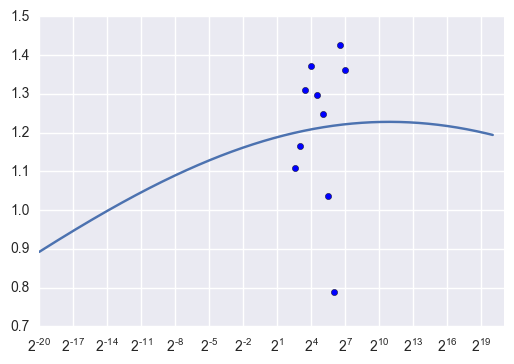

In [33]:
sns.plt.scatter(tmp['frequency_value'], tmp['amplitude_estimate'])
plot_tuning_curve(data=tmp)

In [5]:
a, mode, sigma=(0.98818969370641285, 0.43650524309564304, 0.79026091846015978)
x, y = sfp.tuning_curves.get_tuning_curve_xy(a, mode, sigma)
m, bw, lhm, hhm, warn, x, y = sfp.tuning_curves.log_norm_describe_full(a, mode, sigma)


KeyboardInterrupt: 

In [49]:
a, mode, sigma = (7.6414643191554493e+26, 31.996620943849184, 10.4518910963655)
mu = np.log(mode) + sigma**2
var = (np.exp(sigma**2)-1) * (np.exp(2*mu + sigma**2))

In [57]:
x, y = sfp.tuning_curves.get_tuning_curve_xy(a, mode, sigma)

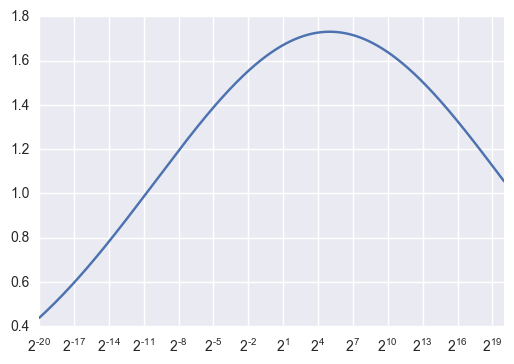

In [58]:
sns.plt.semilogx(x, y, basex=2)
#sns.plt.plot([x.min(), x.max()], [y.max()/2, y.max()/2], 'k--')

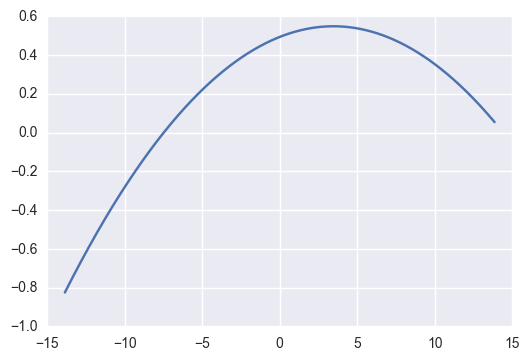

In [60]:
sns.plt.plot(np.log(x), np.log(y))#, basex=2)
#sns.plt.plot([x.min(), x.max()], [y.max()/2, y.max()/2], 'k--')

# Analyzing the first-level results

After running our GLM analysis, we have the estimated amplitude responses of each voxel to each image class. Along with Noah Benson's anatomical template / Bayesian model, we also have each voxel's visual area and location in the visual field (in terms of eccentricity and polar angle). By combining the information contained within them, along with the dataframe describing each stimulus class, we can construct our tuning curves.

In [1]:
import pandas as pd
import nibabel as nib
import numpy as np
import seaborn as sns
%matplotlib inline
import sys
sys.path.append('..')
import sfp
import h5py
import os
import itertools
import pyPyrTools.JBhelpers as jbh
import pyPyrTools as ppt
import scipy as sp
from matplotlib.colors import LinearSegmentedColormap 

/home/billbrod/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/billbrod/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [39]:
d = sfp.utils.load_data('wlsubj042', 'pilot01', atlas_type='prior', df_mode='full')
ds = sfp.utils.load_data('wlsubj042', 'pilot01', atlas_type='prior', df_mode='summary')

Here we see the different stimulus classes, as plotted in frequency space, colored by their superclass. These numbers are roughly log-spaced (doubling).

We also, in order to double-check some of our calculations, plot the distance and angle in frequency space: they look exactly correct.

/home/billbrod/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


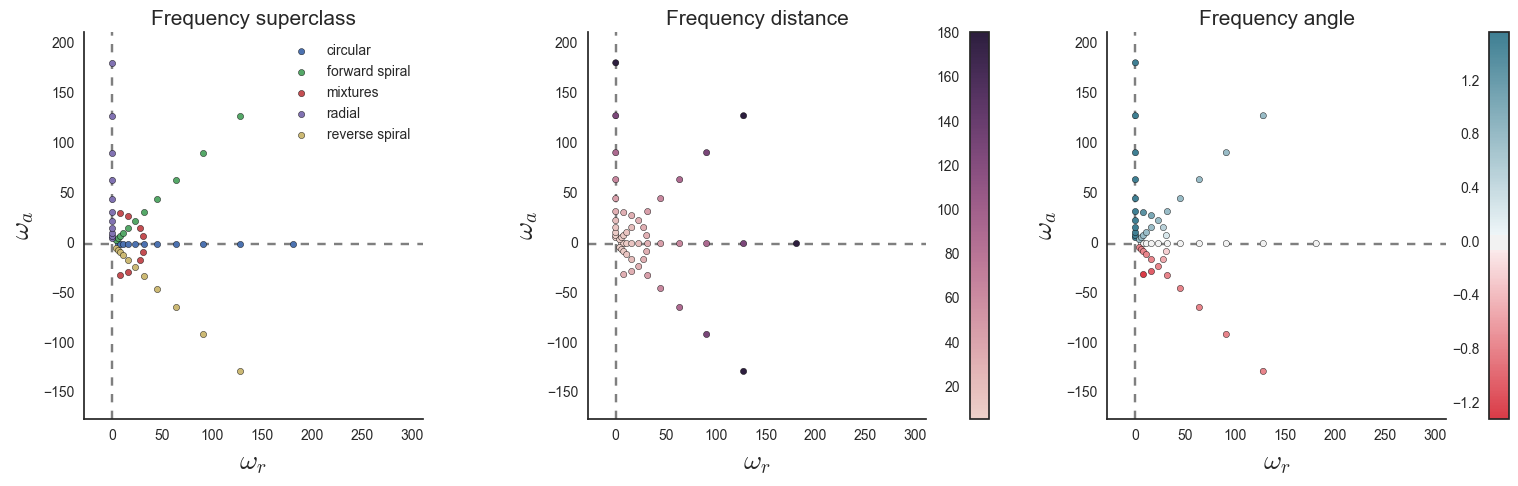

In [3]:
sfp.plotting.stimuli_properties(d['stim_df'])

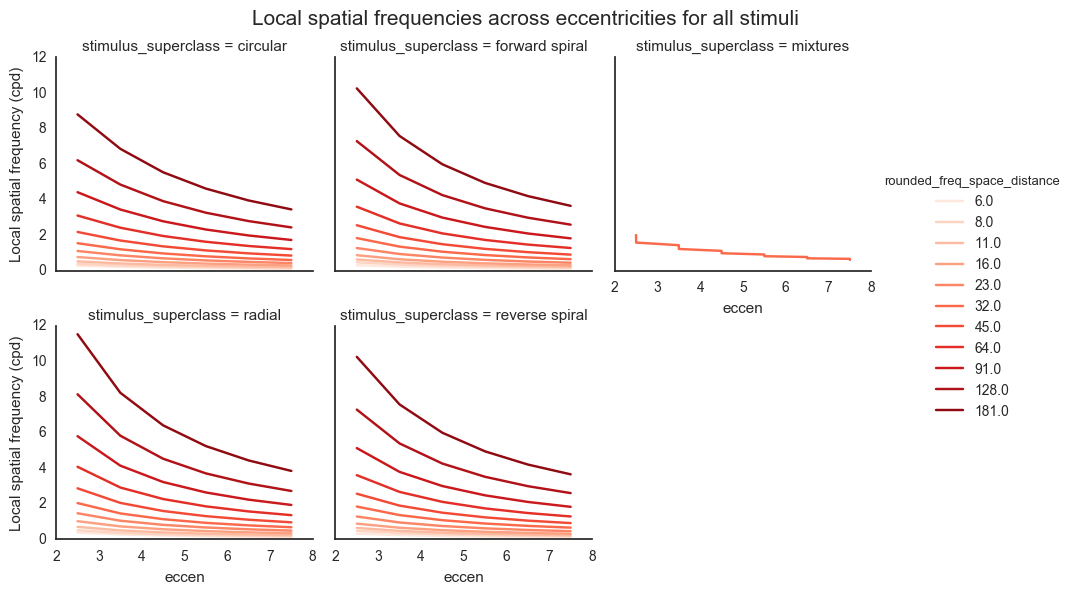

In [4]:
sfp.plotting.local_spatial_frequency(d['df'])

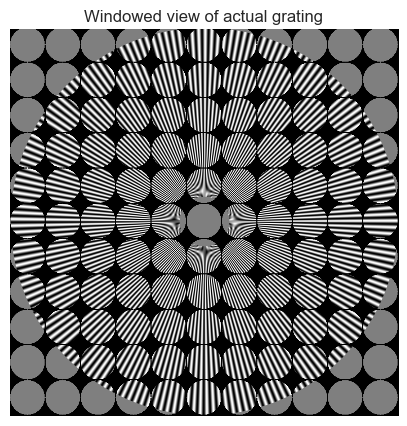

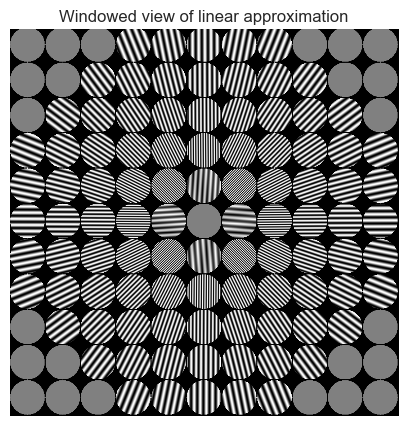

In [19]:
_ = sfp.plotting.stimuli_linear_approximation(d['stim'], d['stim_df'], d['stim_type'], 11, freq_space_distance=181, phi=np.pi/4, stimulus_superclass='radial', save_path='test.svg')

In [5]:
Rmin, Rmax = sfp.first_level_analysis.find_ecc_range_in_degrees(stim[0,:,:], 12)
print("Inside radius of stimulus annulus: %.02f" % Rmin)
print("Outside radius of stimulus annulus: %.02f" % Rmax)

Inside radius of stimulus annulus: 0.96
Outside radius of stimulus annulus: 12.00


In [9]:
tmp_df = tmp_df[tmp_df.eccen=='02-03']

In [11]:
tmp_df.groupby('freq_space_distance')['amplitude_estimate'].apply(np.percentile, [2.5, 97.5])

freq_space_distance
6.0      [1.3934729009882503, 1.8945515036602498]
8.0      [1.2937891602507503, 1.9519198119634997]
11.0         [1.5712215423577498, 2.093450641633]
16.0       [1.6825491666799999, 2.27403050661075]
23.0              [1.81027284861, 2.483429479601]
32.0           [1.91740233898325, 2.546540588139]
45.0          [1.79266227185675, 2.2860874712475]
64.0       [1.3542338222292498, 2.00301219225125]
91.0     [0.8553249150515749, 1.3589151352662494]
128.0      [1.19733902514125, 1.7936720311659997]
181.0      [0.87254487127045, 1.6702991276979997]
Name: amplitude_estimate, dtype: object

In [84]:
import matplotlib.pyplot as plt
def plot_median(x, y, **kwargs):
    """plot line through center points, for use with seaborn's map_dataframe
    """
    data = kwargs.pop('data')
    plot_data = data.groupby(x)[y].median()
    plt.plot(plot_data.index, plot_data.values, **kwargs)


def scatter_ci_col(x, y, ci, **kwargs):
    """plot center points and specified CIs, for use with seaborn's map_dataframe

    based on seaborn.linearmodels.scatterplot. CIs are taken from a column in this function.
    """
    data = kwargs.pop('data')
    plot_data = data.groupby(x)[y].median()
    plot_cis = data.groupby(x)[ci].median()
    plt.scatter(plot_data.index, plot_data.values, **kwargs)
    for (x, ci), y in zip(plot_cis.iteritems(), plot_data.values):
        plt.plot([x, x], [y+ci, y-ci], **kwargs)


def scatter_ci_dist(x, y, ci_vals=[2.5, 97.5], **kwargs):
    """plot center points and specified CIs, for use with seaborn's map_dataframe

    based on seaborn.linearmodels.scatterplot. CIs are taken from a distribution in this
    function. Therefore, it's assumed that the values being passed to it are values from a
    bootstrap distribution.

    by default, this draws the 95% confidence interval. to change this, change the ci_vals
    argument. for instance, if you only want to draw the median point, pass ci_vals=[50, 50] (this is
    eqiuvalent to just calling plt.scatter)
    """
    data = kwargs.pop('data')
    plot_data = data.groupby(x)[y].median()
    plot_cis = data.groupby(x)[y].apply(np.percentile, ci_vals)
    plt.scatter(plot_data.index, plot_data.values, **kwargs)
    for x, (ci_low, ci_high) in plot_cis.iteritems():
        plt.plot([x, x], [ci_low, ci_high], **kwargs)

def plot_data(df, x_col='freq_space_distance', **kwargs):
    # df = df[df.stimulus_superclass.isin(['radial', 'circular'])]
    col_order = [i for i in sfp.plotting.LOGPOLAR_SUPERCLASS_ORDER if i in df.stimulus_superclass.unique()]
    g = sns.FacetGrid(df, hue='eccen', palette='Reds', size=5, row='varea', col='stimulus_superclass',
                      col_order=col_order)
    if 'amplitude_estimate_std_error' in df.columns:
        g.map_dataframe(plot_median, x_col, 'amplitude_estimate_median')
        g.map_dataframe(scatter_ci_col, x_col, 'amplitude_estimate_median', 'amplitude_estimate_std_error', **kwargs)
    else:
        g.map_dataframe(plot_median, x_col, 'amplitude_estimate')
        g.map_dataframe(scatter_ci_dist, x_col, 'amplitude_estimate', **kwargs)
    for ax in g.axes.flatten():
        ax.set_xscale('log', basex=2)
    g.add_legend()

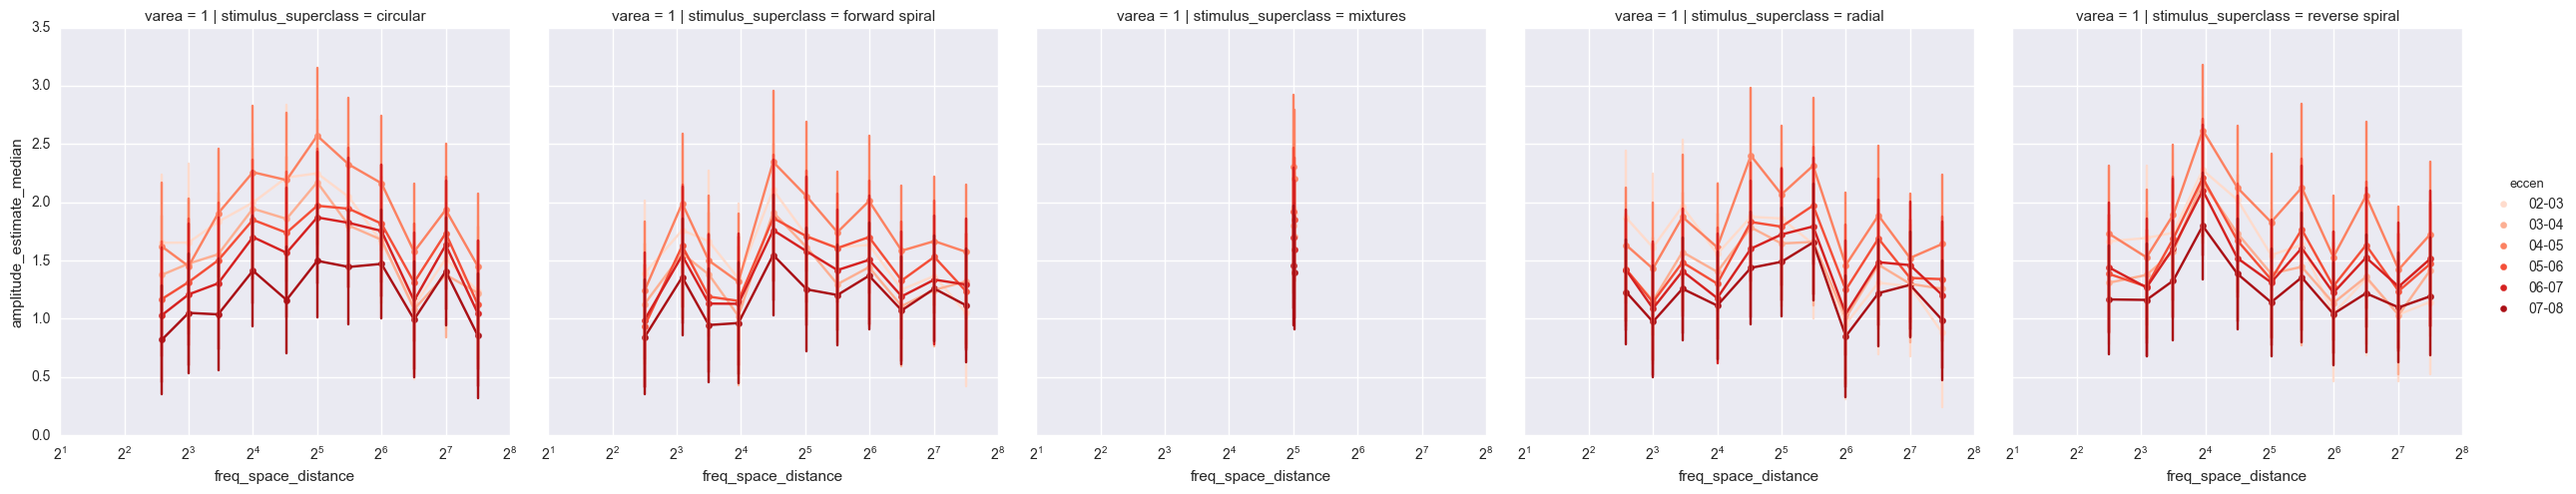

In [ ]:
plot_data(ds['df'], 'freq_space_distance',)# ci_vals=[16, 84])

In [ ]:
plot_data(d['df'], 'freq_space_distance',)# ci_vals=[16, 84])

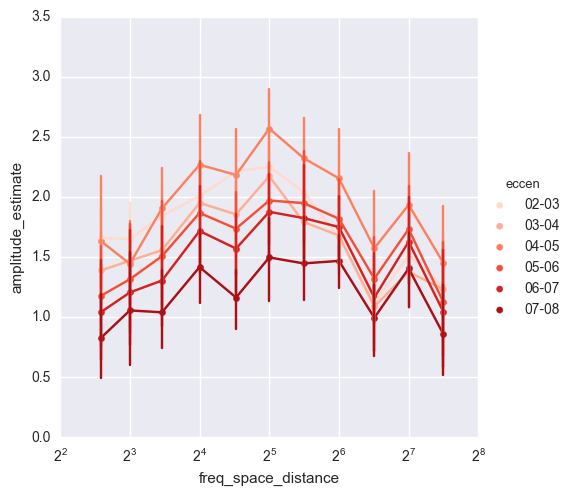

In [6]:
tmp_df = d['df'][d['df'].stimulus_superclass=='circular']
g = sns.FacetGrid(tmp_df, hue='eccen', palette='Reds', size=5,)
#g.map(sns.regplot, 'rounded_freq_space_distance', 'amplitude_estimate', x_estimator=np.mean, fit_reg=False)
g.map_dataframe(sfp.utils.plot_mean, 'rounded_freq_space_distance', 'amplitude_estimate')
g.map_dataframe(sfp.utils.scatter_ci_dist, 'freq_space_distance', 'amplitude_estimate')
for ax in g.axes.flatten():
    ax.set_xscale('log', basex=2)
g.add_legend()

In [26]:
g = sns.FacetGrid(df, hue='eccen', palette='Reds', size=5, col='stimulus_superclass', col_wrap=2,
                  col_order=['circular', 'radial', 'forward spiral', 'reverse spiral', 'mixtures'])
#g.map(sns.regplot, 'freq_space_distance', 'amplitude_estimate', x_estimator=np.mean, fit_reg=False)
g.map_dataframe(sfp.utils.plot_mean, 'freq_space_distance', 'amplitude_estimate')
g.map_dataframe(sfp.utils.scatter_ci_dist, 'freq_space_distance', 'amplitude_estimate')
for ax in g.axes:
    ax.set_xscale('log', basex=2)
g.add_legend()

ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

If there were no scaling in the visual system, such that neurons at different places in the visual field were expected to have similar properties, the bottom would all line up well, and it doesn't!


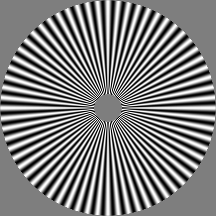
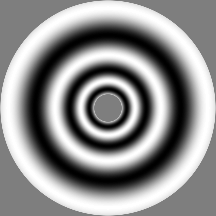
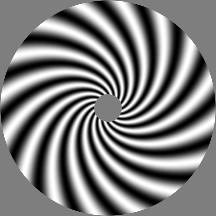
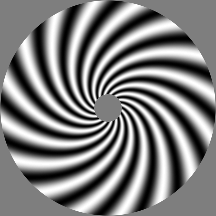

In [17]:
classes_of_interest = []
classes_of_interest.extend(df[(df.stimulus_superclass=='circular')&(df.rounded_freq_space_distance==11)].stimulus_class.unique())
classes_of_interest.extend(df[(df.stimulus_superclass=='radial')&(df.rounded_freq_space_distance==64)].stimulus_class.unique())
classes_of_interest.extend(df[(df.stimulus_superclass=='forward spiral')&(df.rounded_freq_space_distance==23)].stimulus_class.unique())
classes_of_interest.extend(df[(df.stimulus_superclass=='reverse spiral')&(df.rounded_freq_space_distance==23)].stimulus_class.unique())
#classes_of_interest.append(df[df.stimulus_superclass=='mixtures'].stimulus_class.values[0])

stim_idxs = stim_df[stim_df.class_idx.isin(classes_of_interest)].index.values[::8]

jbh.showIm([stim[i, :, :] for i in stim_idxs], ncols=4, zoom=.2)

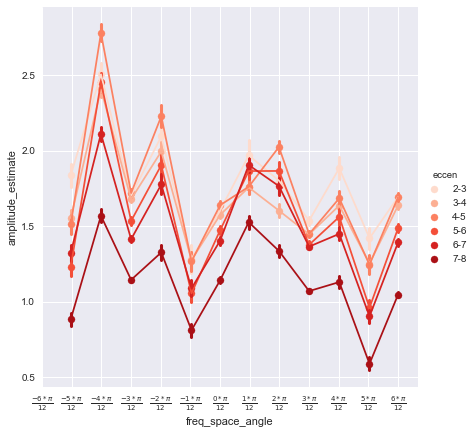

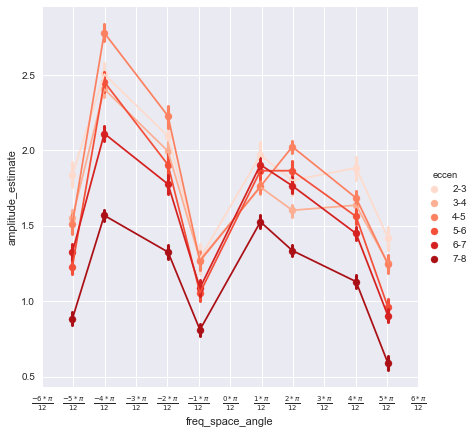

In [52]:
# I know this goes from about -pi/2 to pi/2, in pi/12 steps
ticks = [(np.pi*(i-6)/12.) for i in range(13)]
labels = ['$\\frac{%s*\\pi}{12}$'%(i-6) for i in range(13)]

g = sns.FacetGrid(df, hue='eccen', palette='Reds', size=6)
g.map(sns.regplot, 'freq_space_angle', 'amplitude_estimate', x_estimator=np.mean, fit_reg=False)
g.map_dataframe(sfp.utils.plot_mean, 'freq_space_angle', 'amplitude_estimate')
#g.map_dataframe(sfp.utils.scatter_ci, 'freq_space_angle', 'amplitude_estimate_median', 'amplitude_estimate_std_error') 
_=g.ax.set_xticks(ticks)
_=g.ax.set_xticklabels(labels)
g.add_legend()

# I know this goes from about -pi/2 to pi/2, in pi/12 steps
ticks = [(np.pi*(i-6)/12.) for i in range(13)]
labels = ['$\\frac{%s*\\pi}{12}$'%(i-6) for i in range(13)]

tmp_df = df[df.stimulus_superclass=='mixtures']
g = sns.FacetGrid(tmp_df, hue='eccen', palette='Reds', size=6)
g.map(sns.regplot, 'freq_space_angle', 'amplitude_estimate', x_estimator=np.mean, fit_reg=False)
g.map_dataframe(sfp.utils.plot_mean, 'freq_space_angle', 'amplitude_estimate')
#g.map_dataframe(sfp.utils.scatter_ci, 'freq_space_angle', 'amplitude_estimate_median', 'amplitude_estimate_std_error') 
_=g.ax.set_xticks(ticks)
_=g.ax.set_xticklabels(labels)
g.add_legend()


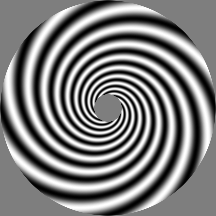
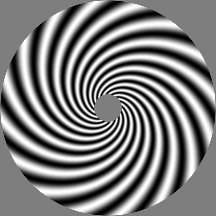
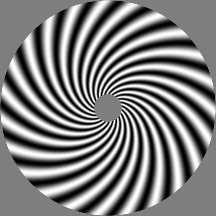
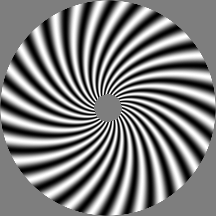
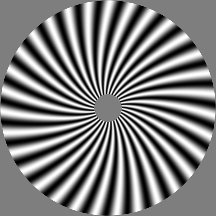
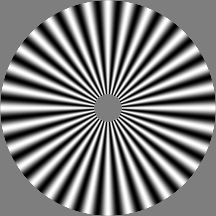
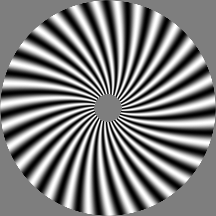
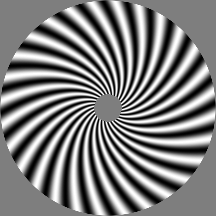
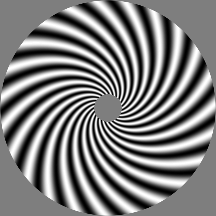
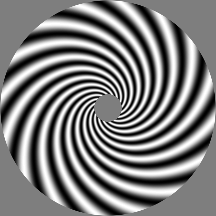
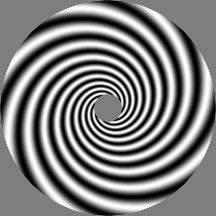
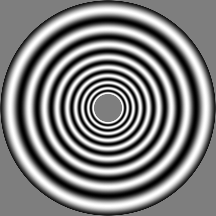

In [85]:
angles = sorted(df.freq_space_angle.unique())
stim_idxs = []
for ang in angles:
    class_of_interest = df[(df.freq_space_angle==ang)&(df.rounded_freq_space_distance==32)].stimulus_class.unique()[0]
    stim_idxs.append(stim_df[stim_df.class_idx==class_of_interest].index[0])

#stim_idxs = stim_df[stim_df.class_idx.isin(classes_of_interest)].index.values[::8]

jbh.showIm([stim[i, :, :] for i in stim_idxs], ncols=4, zoom=.2)

/home/billbrod/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


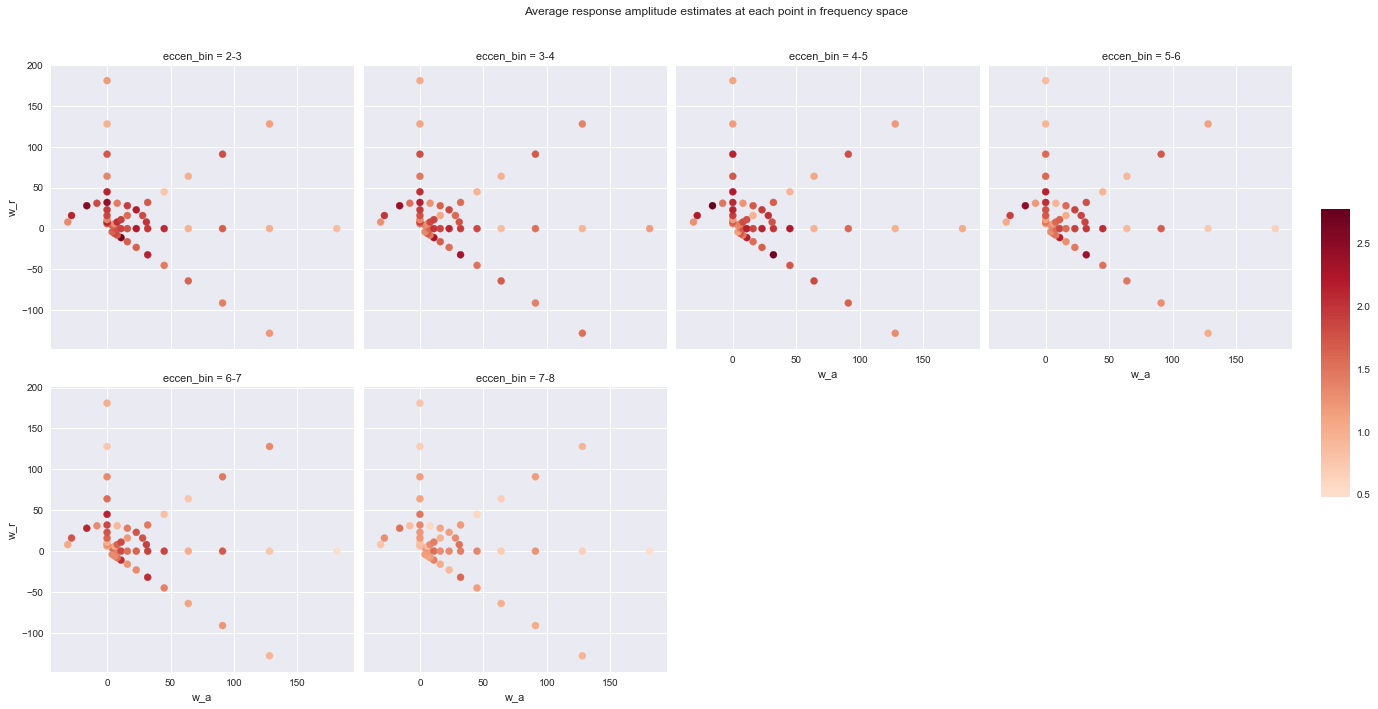

In [16]:
tmp_df = pd.DataFrame(df.groupby(['eccen_bin', 'w_r', 'w_a']).modelmd.mean()).reset_index()

g = sns.FacetGrid(tmp_df, col='eccen_bin', col_wrap=4, size=5)
cbar_ax = g.fig.add_axes([.92, .3, .02, .4])  # <-- Create a colorbar axes
g.map(sfp.utils.scatter_heat, 'w_a', 'w_r', 'amplitude_estimate_median', vmin=tmp_df['amplitude_estimate_median'].min(), 
      vmax=tmp_df['amplitude_estimate_median'].max())
sns.plt.colorbar(cax=cbar_ax)
g.fig.subplots_adjust(right=.9, top=.9)
g.fig.suptitle('Average response amplitude estimates at each point in frequency space')

In [17]:
tmp_df = pd.pivot_table(df, 'amplitude_estimate_median', 'rounded_freq_space_distance', 'eccen_bin')
norm_df = tmp_df.copy()
for col in norm_df.columns:
    norm_df[col] = norm_df[col] / norm_df[col].max()

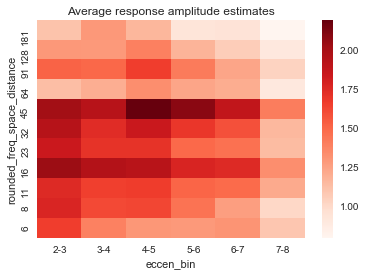

In [80]:
fig = sns.heatmap(tmp_df, cmap='Reds')
fig.invert_yaxis()
fig.set_title('Average response amplitude estimates')

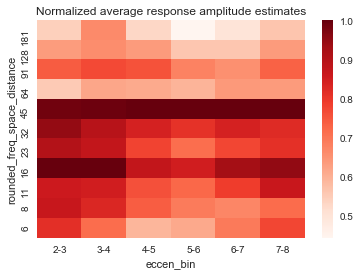

In [81]:
fig = sns.heatmap(norm_df, cmap='Reds')
fig.invert_yaxis()
fig.set_title('Normalized average response amplitude estimates')

In [11]:
df = pd.read_csv('/home/billbrod/Data/spatial_frequency_preferences/derivatives/first_level_analysis/stim_class/prior/sub-wlsubj001/ses-pilot01/sub-wlsubj001_ses-pilot01_task-sfp_summary_v1_e2-8_eccen_bin_hemi_bin.csv')

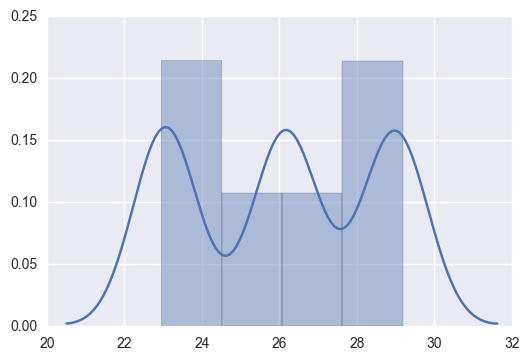

In [12]:
sns.distplot(df.R2.values)

# Create plots for first year talk

In [50]:
# for this, we're only using circular results
tmp_df = df[df.stimulus_superclass=='circular']
# tmp_df = tmp_df[['eccen', 'amplitude_estimate', 'freq_space_distance', 'Local spatial frequency (cpd)', 'bootstrap_num', 'hemi']]
tmp_df = tmp_df[['eccen', 'amplitude_estimate', 'freq_space_distance', 'Local spatial frequency (cpd)', 'bootstrap_num']]

In [51]:
tmper_df = tmp_df[tmp_df.freq_space_distance==6.]
tmper_df = tmper_df.groupby(['eccen', 'bootstrap_num'])['amplitude_estimate'].mean().unstack().reset_index()

In [52]:
hyp_df = pd.melt(tmp_df, ['eccen', 'amplitude_estimate', 'bootstrap_num'], var_name='Frequency')
hyp_df = pd.DataFrame(hyp_df.groupby(['Frequency', 'value', 'bootstrap_num'])['amplitude_estimate'].mean()).reset_index()

In [3]:
#print("freq_space_distance min: %.03f, max: %.03f" % (tmp_df.freq_space_distance.min(), tmp_df.freq_space_distance.max()))
#print("Halfway in log space: %.03f" % np.floor(2**((np.log2(181.) + np.log2(6.))/2.)))
# because these are circular, freq_space_distance==w_r
#stim_idx = stim_df[(stim_df.w_r.isin([6, 32, 181]))&(stim_df.w_a==0)].index[::8]
stim_idx = d['stim_df'][(d['stim_df'].w_r.isin([6, 32, ]))&(d['stim_df'].w_a==0)].index[::8]
stims = [d['stim'][i] for i in stim_idx]

We actually want to plot windows of the stimuli instead of just sins

In [4]:
max_degree_rad = 12
scale_factor = 10
mask = sfp.utils.create_circle_mask(750, 350, scale_factor* 1080/(2*2*max_degree_rad), 1080)
stim_windows = [mask * s + ~mask.astype(bool)*127 for s in stims]


NameError: name 'stims' is not defined

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

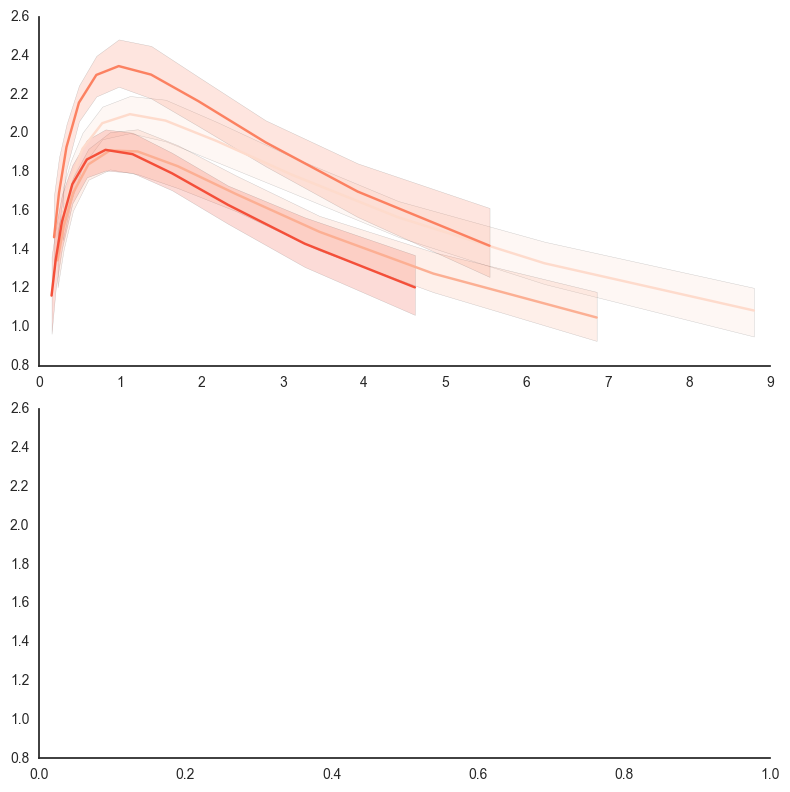

In [3]:
tmp_df = d['df']
tmp_df = tmp_df[(tmp_df.stimulus_superclass=='circular')&(tmp_df.eccen.isin(['02-03', '03-04', '04-05', '05-06', '06-07', '07-08']))]#&(tmp_df.bootstrap_num.isin(range(5)))]
sfp.plotting.compare_hypotheses(tmp_df)

../sfp/utils.py:234: UserWarning: The following bootstrap was not well fit by a log Gaussian and so is skipped:
eccen                                          03-04
bootstrap_num                                      0
stimulus_superclass                   forward spiral
Frequency              Local spatial frequency (cpd)
Name: 1895, dtype: object
  " skipped:\n%s" % data.iloc[0][idx])
../sfp/utils.py:234: UserWarning: The following bootstrap was not well fit by a log Gaussian and so is skipped:
eccen                                          07-08
bootstrap_num                                      0
stimulus_superclass                   forward spiral
Frequency              Local spatial frequency (cpd)
Name: 1915, dtype: object
  " skipped:\n%s" % data.iloc[0][idx])
../sfp/utils.py:234: UserWarning: The following bootstrap was not well fit by a log Gaussian and so is skipped:
eccen                                          02-03
bootstrap_num                                      0
stim

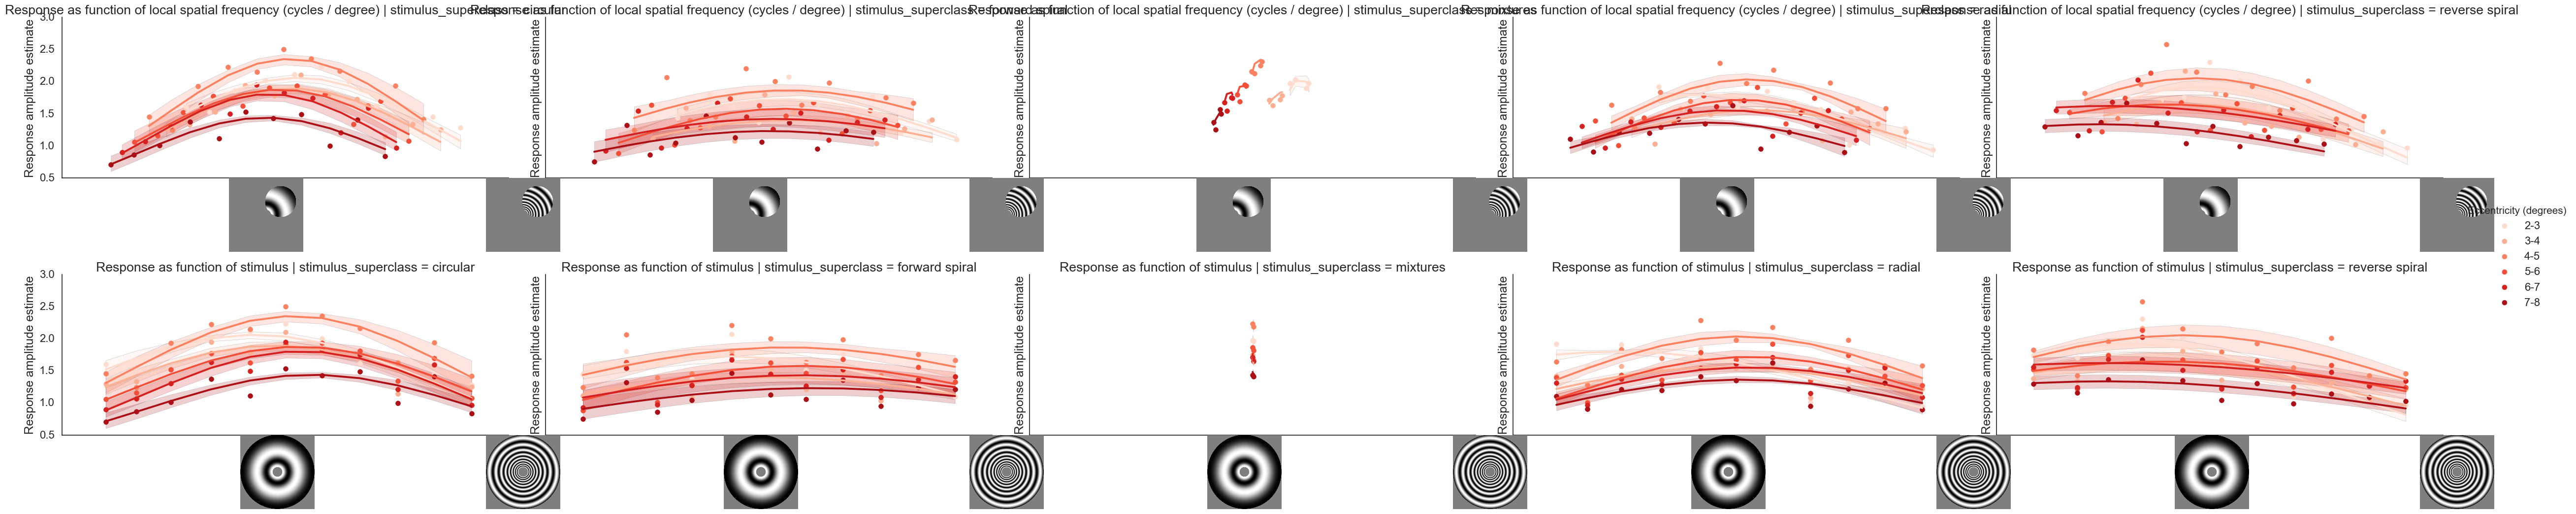

In [6]:
tmp_df = d['df']
tmp_df = tmp_df[(tmp_df.bootstrap_num.isin(range(5)))]
sfp.plotting.compare_hypotheses_talk(tmp_df, stims)

In [13]:
# for this, we're only using circular results
tmp_df = d['df'][d['df'].stimulus_superclass.isin(['circular'])]
# tmp_df = tmp_df[['eccen', 'amplitude_estimate', 'freq_space_distance', 'Local spatial frequency (cpd)', 'bootstrap_num', 'hemi']]
tmp_df = tmp_df[['stimulus_superclass','eccen', 'amplitude_estimate', 'freq_space_distance', 'Local spatial frequency (cpd)', 'bootstrap_num']]
tmp_df = tmp_df[tmp_df.bootstrap_num.isin(range(5))]

peak_df = sfp.plotting.peak_spatial_frequency(tmp_df, id_vars=['stimulus_superclass'])

In [14]:
speak_df

bandwidth  eccen      peak stimulus_superclass  peak_hyperbola_param
03  361124.332517    2.5  1.163916            circular              0.259305
04  136066.843456    3.5  1.085951            circular              0.259305
05   38515.227255    4.5  1.060452            circular              0.259305
06   57147.822236    5.5  0.926438            circular              0.259305
07    6983.125012    6.5  0.814249            circular              0.259305
08   22036.688090    7.5  0.783039            circular              0.259305

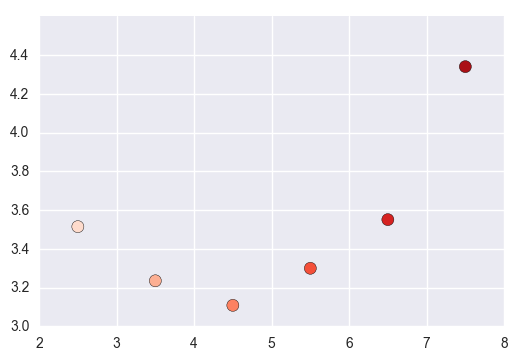

In [30]:
sns.plt.scatter(bandwidth[:,0], bandwidth[:,1], c=sns.color_palette('Reds', 6), s=75)

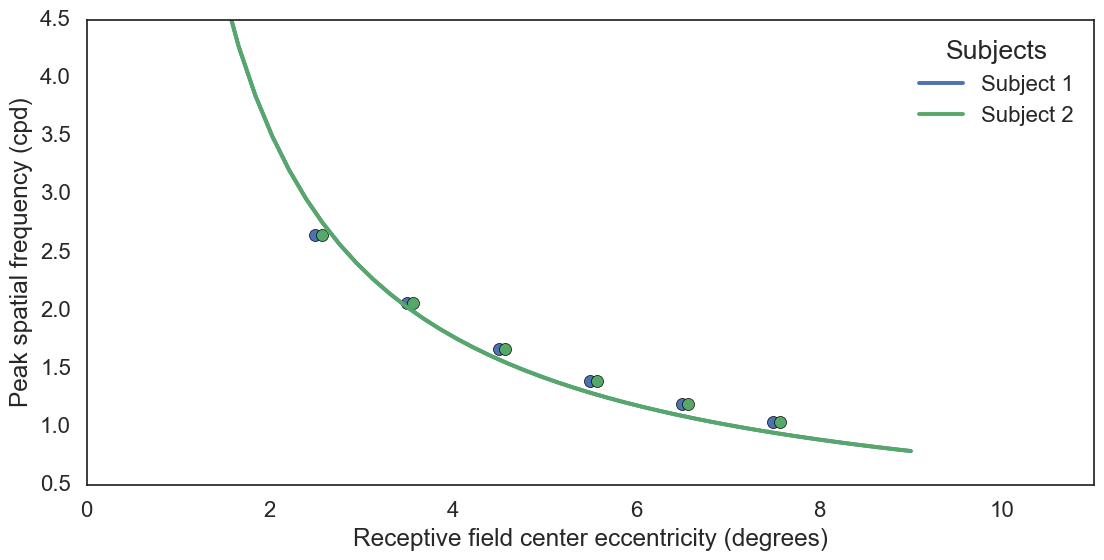

In [124]:
ecc = np.linspace(.01, 9, 50)
RF_scale_factor = 4.
V1_RF_size = np.concatenate([np.ones(len(ecc[ecc<.5]))/RF_scale_factor, np.linspace(1/RF_scale_factor, 4/RF_scale_factor, len(ecc[ecc>=.5]))])
#V2_RF_size = np.concatenate([2*np.ones(len(ecc[ecc<4])), np.linspace(2, 2.5, len(ecc[ecc>=4]))])

Olsson_peak = [2.75, 2.11, 1.76, 1.47,1.24, 1.06, .88, .77, .66, .60]
Olsson_ecc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

with sns.plotting_context('poster', font_scale=1), sns.axes_style('white'):
    # because this doesn't represent data, just intuition, we use this.
#    with plt.xkcd():
    x = np.linspace(.01, 9, 50)
    y = []
    fig, axes = sns.plt.subplots(1,1, figsize=(13,6))
    ax = axes
    # this gives intuitive plots, currently we want the possible hypotheses instead
#         for i in range(3):
#             y.append(10/(x+2)+i)
#             ax.plot(x, y[-1],  label='V%s'%(i+1), color=['r','g','b'][i])
    colors = sns.color_palette(n_colors=3)
    for i, (p, o) in enumerate([[peak_01_s0, opt_a_01_s0], [peak_01, opt_a_01]]):#, [peak_45, opt_a_45]]):
#    ax.plot(ecc, hyperbola(ecc, opt_a), '-', label='scaling')
#        ax.plot(ecc, hyperbola(ecc, o), '-', label='scaling', c= colors[i])
        ax.plot(ecc, hyperbola(ecc, o), '-', label='Subject %s'%(i+1), c= colors[i])
#    ax.plot(ecc, np.ones(len(ecc))*RF_scale_factor, '--', label='constant')
#        ax.set_ylim((0,8))
#    sns.plt.scatter(peak[:, 0], peak[:, 1], c=sns.color_palette('Reds', 6), s=75,)# label='This study')
        if i==1:
            sns.plt.scatter(p[:, 0]+.07, p[:, 1], c=colors[i], s=75,)# label='This study')
        else:
            sns.plt.scatter(p[:, 0], p[:, 1], c=colors[i], s=75,)# label='This study')
#    sns.plt.scatter(Olsson_ecc, Olsson_peak, s=75, c= sns.color_palette('Blues', 10), label='Olsson pilot')
    ax.set_xlabel("Receptive field center eccentricity (degrees)")
    ax.set_ylabel("Peak spatial frequency (cpd)")
    ax.set_title("")
    ax.set_ylim((.5, 4.5))
    ax.set_xlim((0, 11))

    sns.plt.legend(title="Subjects", loc='best')
#    ax.figure.savefig('results-hypotheses.svg', bbox_inches='tight')